In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

# Reporte 10

### Belén Herrada Ruiz - 20203026

###  Parte 1

#### Ensayo: (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics - Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. 

La investigación realizada por Bell, Chetty, Jaravel, Petkovan y Van Reenen titulada ‘Who becomes an inventor in America? The importance of exposure to innovation’ que plantea cómo problemática a abordar la brecha de producción de inventos, específicamente caracterizan los factores que determinan quien se convierte en un inventor en los Estados Unidos. Esto debido a la importancia de la innovación para el crecimiento económico. Así, lograron presentar evidencia en los factores, que lo ocasionan al rastrear la vida de los inventores del país norteamericano desde su nacimiento a la adultez, y sus dimensiones  a través del ingreso de los padres, la “raza” y el género. Por tanto se puede identificar que la pregunta de investigación es ¿por qué la innovación varía tanto según las características al nacer? Este análisis de búsqueda del efecto causal tiene un enfoque en relación al papel que la capacidad inventiva de “naturaleza” frente al entorno a la “crianza”. 

Dentro de la investigación se han encontrado múltiples fortalezas. Por un lado, el enfoque de la investigación abarca diversas aristas sociales al momento de plantear posibles respuestas de investigación, ya que revelan una valorización a factores sociales como se ejemplifica al mencionar que sus estimaciones indican que si las mujeres, énfasis en la disparidad de género, estuviesen expuestas a mujeres inventoras como los hombres a los hombres inventores en su niñez, la actual brecha de género en innovación puede reducirse a la mitad. Esto demuestra el impacto que tiene una de las dimensiones analizadas. Asimismo, otra fortaleza es la línea de seguimiento de investigaciones previas, demostrando la consistencia de los efectos causales evidenciados, como los efectos de la exposición del vecindarios sobre ingresos, la asistencia a la universidad entre otros, lo cual se evidencia en lo hallado con respecto a que los niños de familias de bajos ingresos, las minorías  tienen menos probabilidades de tener tal exposición a través de sus familias y vecindarios, lo que ayuda a explicar por qué tienen índices de innovación significativamente más bajos en general. Por otro lado, ante estos análisis sociales se puede identificar que se tiene presente detrás de la investigación el reconocimiento de la existencia del privilegio de ciertos grupos que determinan el acceso y posibilidad de generar innovación. En cambio, una de las debilidades encontradas dentro del documento es la falta de orientación directa y clara sobre políticas específicas para aumentar la exposición a la innovación, carencia que es admitida por los mismos autores. 

De igual manera, con respectos a los aportes realizados a partir del documento es primero, con respecto a la literatura relacionada, porque genera una contribución a esta a partir de los resultados encontrados. Concretamente a la literatura de elección de carrera, ya que lograron separar los efectos de la exposición causal de los efectos de la selección e identificar los factores que afecta su elección, como el efecto causal de la exposición infantil y presenta datos completos y estadísticas disponibles públicamente sobre los orígenes y las carreras de los inventores en los Estados Unidos. Además, con sus resultados se pueden plantear que la posibilidad de que los costos de bienestar de las distorsiones en la asignación de talento puedan ser incluso mayores de lo previsto por otros modelos como  el de Hsieh.

Por último, uno de los siguientes pasos específicos en la investigación se puede dar en la extrapolación de la problemática a América Latina. La brecha de innovación, que por los autores fue centrada en EE UU, a través de la investigación propongo que se analicen las mismas dimensiones consideradas en el documento de Bell et. all para responder si estas se reconfiguran en un contexto lationamericano. Para esto, instituciones como la CEPAL, en Capital de riesgo e innovación en América Latica (2008),  ya ha considerado factores que apoyan el proceso de producción y su relación métodos productivos en un contexto de rezago de la región en dicha materia. 

http://hdl.handle.net/11362/11287


### Parte 2 

(a) La regresión discontinua es un diseño cuasi-experimental que permtie realizar una deducción en ausentia de la aletoriedad. Asimismo es una forma de identificado causal ante un experimetno natural; es decir utiliza data historica , como una intervención que escapa del individuo, y se le aplica metodología moderna. Así, logra explicar de una forma explicativa el efecto histórico de largo plazo de outcomes a través de un método que utilizan cortes hechos por ley o diseño.

(b) Un caso que podría ejemplificar la utilización de la regresión discontinua se plantería en relación al terremoto de 2007 en Ica.  Especificamente si se busca analizar el efecto de este en la reubicación urbana de la población menor de edad al momento del desastre natural tras la destrucción de Pisco.

(c)El sharp desing es un tipo de regresión discontiua para la construcción de modelos con el objetivo de identificar efectos causales de algun tratamiento. El cambio discontinuo en la probabilidad de ser parte del grupo de traamiento pasa de 0 a 1 en discontinuidad para asignar el tratamiento siguiendo una regla deterministas. Por lo que para que se inicie el tratamiento de la variable debe cruzar el umbral. Entonces, el sharp dising ocurre cuando la variable de asignación determina completamente la participación en el grupo de tratamietno a partir del punto de corte por lo que un ejemplo sería la implementación de una ley de salud por parte del gobierno, la cual beneficia especificamente a los mayores de 25 años. Así, el grupo de control sería los menores de 25 años y el punto de corte sería 25 años. Apartir de esto se podría medir la efectivdad de dicha ley con respecto. 

### Parte 3

#### 3.1

In [17]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)}) #50 siendo promedio y 25 varianza, puede elegir cualquier numero
dat.loc[dat.x<0, 'x'] = 0 #ubicar las observaciones que x sea menor a 0
dat = dat[dat.x<100]
dat['D'] = 0 #generar una columna igual a 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1 #para todas las observaciones que su valor sea por encima del 50, la variable de tratamiento sea = 1
# Simulated Y - se va a crear la variable Y, se generá la ecuasión
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment: los no tratados, de la columna D que son 0
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

In [13]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat

,x
0,68.263640
1,47.924012
2,30.555317
3,58.261786
4,24.515660
...,...
995,53.305283
996,61.454734
997,95.325144
998,43.801551


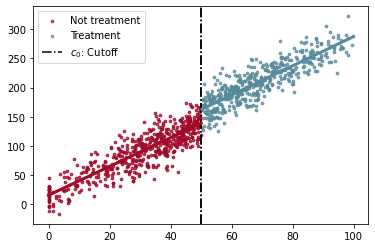

In [9]:
#Plotear grafico

# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment") #controles
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff") 

plt.legend(); 

def y_hat_lin(da_ta, x = "x", y = "y"): #predicción
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);



In [10]:
eff = min(data_y1.yhat) - max(data_y0.yhat) #de las rectascreadsa
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 24.04


In [16]:
#Construcción del modelo 

outcome = "y"
treatment = "D"

fml = outcome + "~" + treatment
ols = smf.ols ("y ~ D", dat )
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2304.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          4.78e-259
Time:                        17:25:49   Log-Likelihood:                -4931.4
No. Observations:                 977   AIC:                             9867.
Df Residuals:                     975   BIC:                             9877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.9936      1.700     53.540      0.000      87.658      94.329
D            115.7926      2.412     48.003      0.000     111.059     120.526
==============================================================================
Omnibus:                        5.554   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.250
Skew:                          -0.025   Prob(JB):                        0.119
Kurtosis:                       2.681   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El intercepto del modelo nos muestra un valor de 90 unidades logaritmicas. Se puede inferir a través de modelo, que la variable D tiene un coeficiente positivo, por lo que mientras Y aumente, la varible D aumentará en 115 unidades logaritmicas. 

#### 3.2

In [24]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)}) #50 siendo promedio y 25 varianza, puede elegir cualquier numero
dat.loc[dat.x<0, 'x'] = 0 #ubicar las observaciones que x sea menor a 0
dat = dat[dat.x<100]
dat['D'] = 0 #generar una columna igual a 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1 #para todas las observaciones que su valor sea por encima del 50, la variable de tratamiento sea = 1
# Simulated Y - se va a crear la variable Y, se generá la ecuasión
dat['y'] = 12 + 60*dat.D + 1.3 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment: los no tratados, de la columna D que son 0
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

In [19]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat

,x
0,49.533719
1,23.702092
2,57.622330
3,68.165364
4,84.934905
...,...
995,54.645522
996,41.521333
997,36.412130
998,24.771022


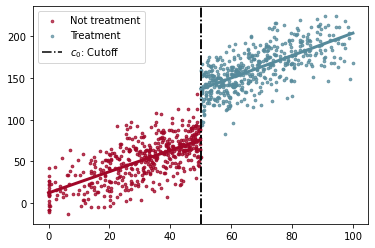

In [21]:
#Plotear grafico

# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment") #controles
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff") 

plt.legend(); 

def y_hat_lin(da_ta, x = "x", y = "y"): #predicción
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [22]:
eff = min(data_y1.yhat) - max(data_y0.yhat) #de las rectascreadsa
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 60.82


In [25]:
#Construcción del segundo modelo 

outcome = "y"
treatment = "D"

fml = outcome + "~" + treatment
ols = smf.ols ("y ~ D", dat )
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     4257.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:08:37   Log-Likelihood:                -4535.6
No. Observations:                 970   AIC:                             9075.
Df Residuals:                     968   BIC:                             9085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.3299      1.188     44.899      0.000      50.999      55.661
D            108.9218      1.669     65.243      0.000     105.646     112.198
==============================================================================
Omnibus:                        2.989   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.575
Skew:                          -0.023   Prob(JB):                        0.276
Kurtosis:                       2.752   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El intercepto del modelo nos muestra un valor de 53 unidades logaritmicas. Se puede inferir a través de modelo, que la variable D tiene un coeficiente positivo, por lo que mientras Y aumente, la varible D aumentará en 108 unidades logaritmicas. La variación de valores evidencia a comparacíón del primer modelo creado una disminución en unidades logaritmicas de D en este segundo modelo. 

### Parte 4

In [45]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 25 + 40*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

In [46]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat

,x
0,104.029765
1,33.293779
2,62.783295
3,48.446488
4,31.761284
...,...
995,20.193127
996,79.501756
997,24.468928
998,83.963620


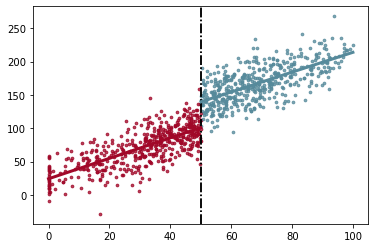

In [47]:
#Plotear grafico

# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment") #controles
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff") 


def y_hat_lin(da_ta, x = "x", y = "y"): #predicción
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

Effect: 38.69


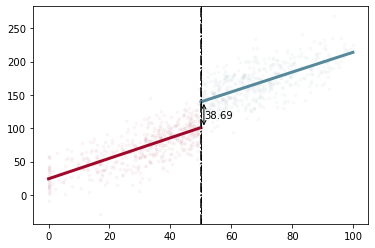

In [48]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));